# 코로나19의 일일확진자 수와 게임주들의 주가(종가, 고가)의 비교

In [84]:
import numpy as np
import numpy.random as random
import scipy as sp
import scipy.stats as stats
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

%precision 3


'%.3f'

# Dataset 불러오기

In [26]:
corona = pd.read_csv('COVID19inKorea.csv', encoding = 'euc-kr')
Nexon_GT = pd.read_csv('NEXON_GT.csv', encoding = 'euc-kr')
Netmarble = pd.read_csv('Netmarble.csv', encoding = 'euc-kr')
NC_soft = pd.read_csv('NC_soft.csv', encoding = 'euc-kr')
Gamevil = pd.read_csv('Gamevil.csv', encoding = 'euc-kr')
Com2us = pd.read_csv('com2us.csv', encoding = 'euc-kr')
Mgame = pd.read_csv('Mgame.csv', encoding = 'euc-kr')

### confirm이 누적확진자 수이기 때문에 일일확진자 수를 따로 추가해줌

In [37]:
corona['dailyc']=corona.confirm
for i in range(len(corona.confirm)-1):
    corona['dailyc'][i]=corona['confirm'][i]-corona['confirm'][i+1]

<ipython-input-37-344e994b8b0a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corona['dailyc'][i]=corona['confirm'][i]-corona['confirm'][i+1]


## 각 주식의 종가와 merge

In [88]:
Corona_Jongga = pd.merge(corona[['날짜', 'dailyc']], Nexon_GT[['날짜', '종가']], on='날짜')
Corona_Jongga = pd.merge(Corona_Jongga, Netmarble[['날짜', '종가']], on='날짜')
Corona_Jongga = pd.merge(Corona_Jongga, NC_soft[['날짜', '종가']], on='날짜')
Corona_Jongga = pd.merge(Corona_Jongga, Gamevil[['날짜', '종가']], on='날짜')
Corona_Jongga = pd.merge(Corona_Jongga, Com2us[['날짜', '종가']], on='날짜')
Corona_Jongga = pd.merge(Corona_Jongga, Mgame[['날짜', '종가']], on='날짜')
Corona_Jongga.columns = ['Date', 'Daily', 'NexonGT', 'Netmarble', 'NCsoft', 'Gamevil', 'Com2us', 'Mgame']
Corona_Jongga

,Date,Daily,NexonGT,Netmarble,NCsoft,Gamevil,Com2us,Mgame
0,2021.04.15,698,14650,141000,923000,49700,174300,8740
1,2021.04.14,731,14400,141500,916000,48550,173600,9150
2,2021.04.13,542,14000,138500,914000,48700,175400,9140
3,2021.04.12,587,13900,140000,906000,49450,177600,9380
4,2021.04.09,671,13550,131500,925000,48450,173600,9250
...,...,...,...,...,...,...,...,...
302,2020.01.28,0,6600,91900,644000,29950,104300,3925
303,2020.01.23,0,6820,96400,646000,31450,108400,3855
304,2020.01.22,0,6920,94100,643000,31900,108800,3860
305,2020.01.21,0,6830,93600,632000,30900,106500,3770


## 각 주식의 고가와 일일확진자 merge

In [90]:
Corona_Goga = pd.merge(corona[['날짜', 'dailyc']], Nexon_GT[['날짜', '고가']], on='날짜')
Corona_Goga = pd.merge(Corona_Goga, Netmarble[['날짜', '고가']], on='날짜')
Corona_Goga = pd.merge(Corona_Goga, NC_soft[['날짜', '고가']], on='날짜')
Corona_Goga = pd.merge(Corona_Goga, Gamevil[['날짜', '고가']], on='날짜')
Corona_Goga = pd.merge(Corona_Goga, Com2us[['날짜', '고가']], on='날짜')
Corona_Goga = pd.merge(Corona_Goga, Mgame[['날짜', '고가']], on='날짜')
Corona_Goga.columns = ['Date', 'Daily', 'NexonGT', 'Netmarble', 'NCsoft', 'Gamevil', 'Com2us', 'Mgame']
Corona_Goga

,Date,Daily,NexonGT,Netmarble,NCsoft,Gamevil,Com2us,Mgame
0,2021.04.15,698,14800,144000,930000,50200,176000,9170
1,2021.04.14,731,14450,144000,920000,48750,177000,9360
2,2021.04.13,542,14000,140500,914000,49900,179100,9410
3,2021.04.12,587,14150,140000,923000,49600,178500,9550
4,2021.04.09,671,13600,133000,933000,49400,177400,10150
...,...,...,...,...,...,...,...,...
302,2020.01.28,0,6680,95300,652000,30850,105900,3980
303,2020.01.23,0,6920,97300,646000,32150,110500,3910
304,2020.01.22,0,6920,94800,644000,32450,108800,3890
305,2020.01.21,0,7040,95100,641000,32250,109400,3815


# 종가 및 고가에서의 Pairplot

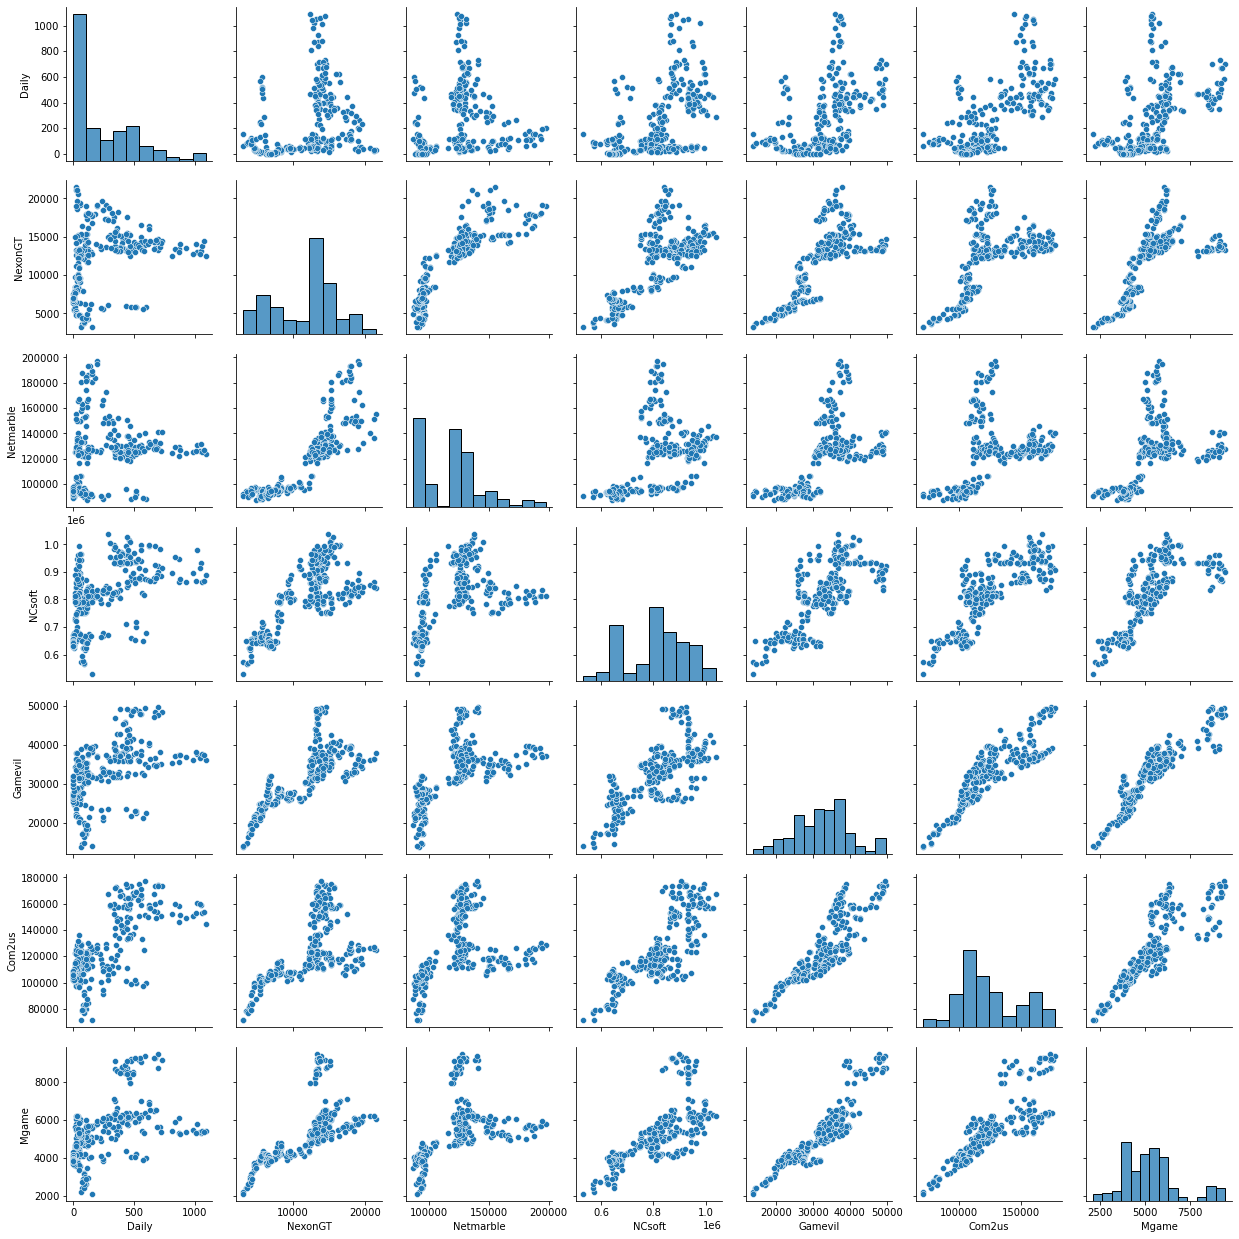

In [89]:
sns.pairplot(Corona_Jongga)

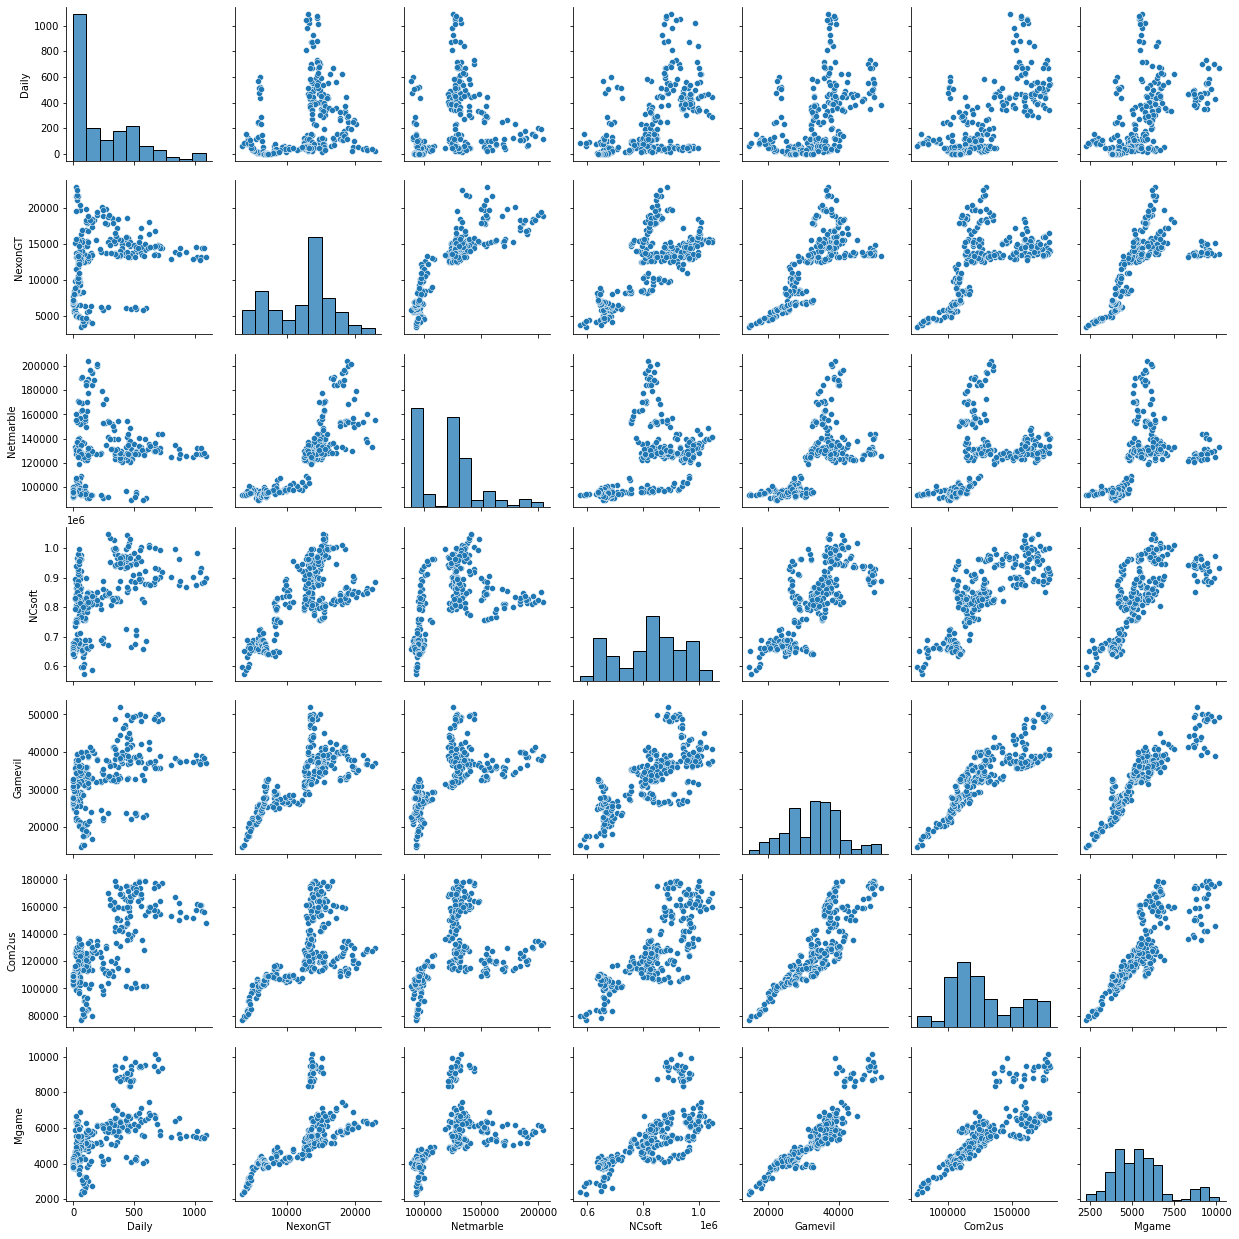

In [91]:
sns.pairplot(Corona_Goga)

In [119]:
Corr = Corona_Jongga.corr(method='spearman')
Corrr = Corona_Goga.corr(method='spearman')

# 각 게임주의 주가와 일일확진자 사이의 상관관계

In [121]:
Corr.Daily[1:7]

NexonGT      0.442682
Netmarble    0.409087
NCsoft       0.585677
Gamevil      0.586138
Com2us       0.648246
Mgame        0.653689
Name: Daily, dtype: float64

In [122]:
Corrr.Daily[1:7]

NexonGT      0.434268
Netmarble    0.394710
NCsoft       0.581293
Gamevil      0.585260
Com2us       0.653213
Mgame        0.652652
Name: Daily, dtype: float64

#### 코로나 19 일일확진자수가 사람들의 실내활동의 지표가 될 수 있을 줄 알았으나 그렇지 않았음을 알 수 있다.
#### 혹여나 실내활동의 지표가 된다 하더라도 실내활동 중 하나인 게임 활동이 주가에 영향을 미치기 힘들다는 결론을 얻을 수 있다.

# 각 게임주 사이의 상관관계(평균)

In [117]:
print(Corr.NexonGT[1:7].sort_values()[0:-1].mean())
print(Corr.Netmarble[1:7].sort_values()[0:-1].mean())
print(Corr.NCsoft[1:7].sort_values()[0:-1].mean())
print(Corr.Gamevil[1:7].sort_values()[0:-1].mean())
print(Corr.Com2us[1:7].sort_values()[0:-1].mean())
print(Corr.Mgame[1:7].sort_values()[0:-1].mean())


0.7707012398120189
0.6999998347210326
0.7158814435939795
0.8202827532716842
0.7944539195238892
0.83341875940193


In [120]:
print(Corrr.NexonGT[1:7].sort_values()[0:-1].mean())
print(Corrr.Netmarble[1:7].sort_values()[0:-1].mean())
print(Corrr.NCsoft[1:7].sort_values()[0:-1].mean())
print(Corrr.Gamevil[1:7].sort_values()[0:-1].mean())
print(Corrr.Com2us[1:7].sort_values()[0:-1].mean())
print(Corrr.Mgame[1:7].sort_values()[0:-1].mean())


0.7621108616366477
0.6919794260971133
0.7097188263372074
0.8124435960038353
0.7908342703843865
0.826080870171903


#### 각 게임사간의 상관도가 0.7~0.8에서 머물고 있기 때문에 동일 종목에서의 주가는 어느정도 상관관계가 있음을 알 수 있지만 그래프에서 볼 수 있듯이 다른 원인이 끼어들 수 있는 큰 기업 사이의 상관관계보다 작은 규모의 기업 사이의 상관관계가 더 강함을 알 수 있다.

## 사회적 거리두기 2단계 실시 전후로 나눠보기

In [142]:
Cov_2 = Corona_Jongga.iloc[0:86]
Cov_1 = Corona_Jongga.iloc[86:307]
Cov_1

,Date,Daily,NexonGT,Netmarble,NCsoft,Gamevil,Com2us,Mgame
86,2020.12.08,594,14450,128000,874000,35100,151700,6340
87,2020.12.07,615,14100,129500,871000,34250,150000,6170
88,2020.12.04,629,14500,132000,867000,36400,156500,6510
89,2020.12.03,540,13650,130000,878000,36000,150900,6100
90,2020.12.02,511,12950,125500,859000,32500,142100,5870
...,...,...,...,...,...,...,...,...
302,2020.01.28,0,6600,91900,644000,29950,104300,3925
303,2020.01.23,0,6820,96400,646000,31450,108400,3855
304,2020.01.22,0,6920,94100,643000,31900,108800,3860
305,2020.01.21,0,6830,93600,632000,30900,106500,3770


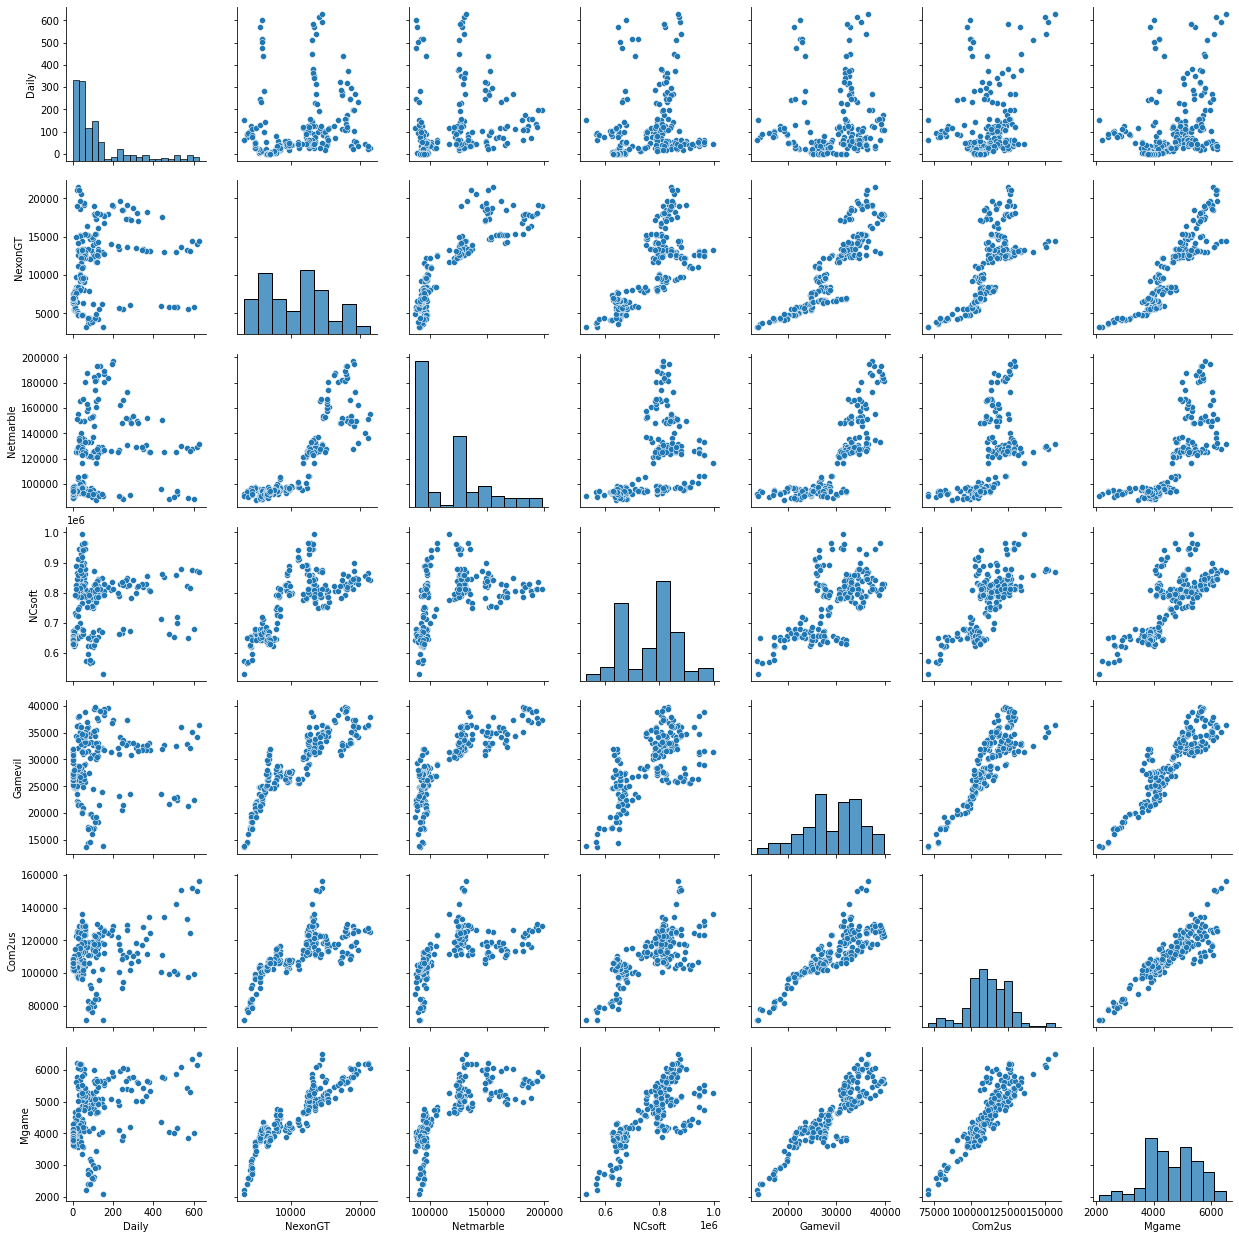

In [136]:
sns.pairplot(Cov_1)

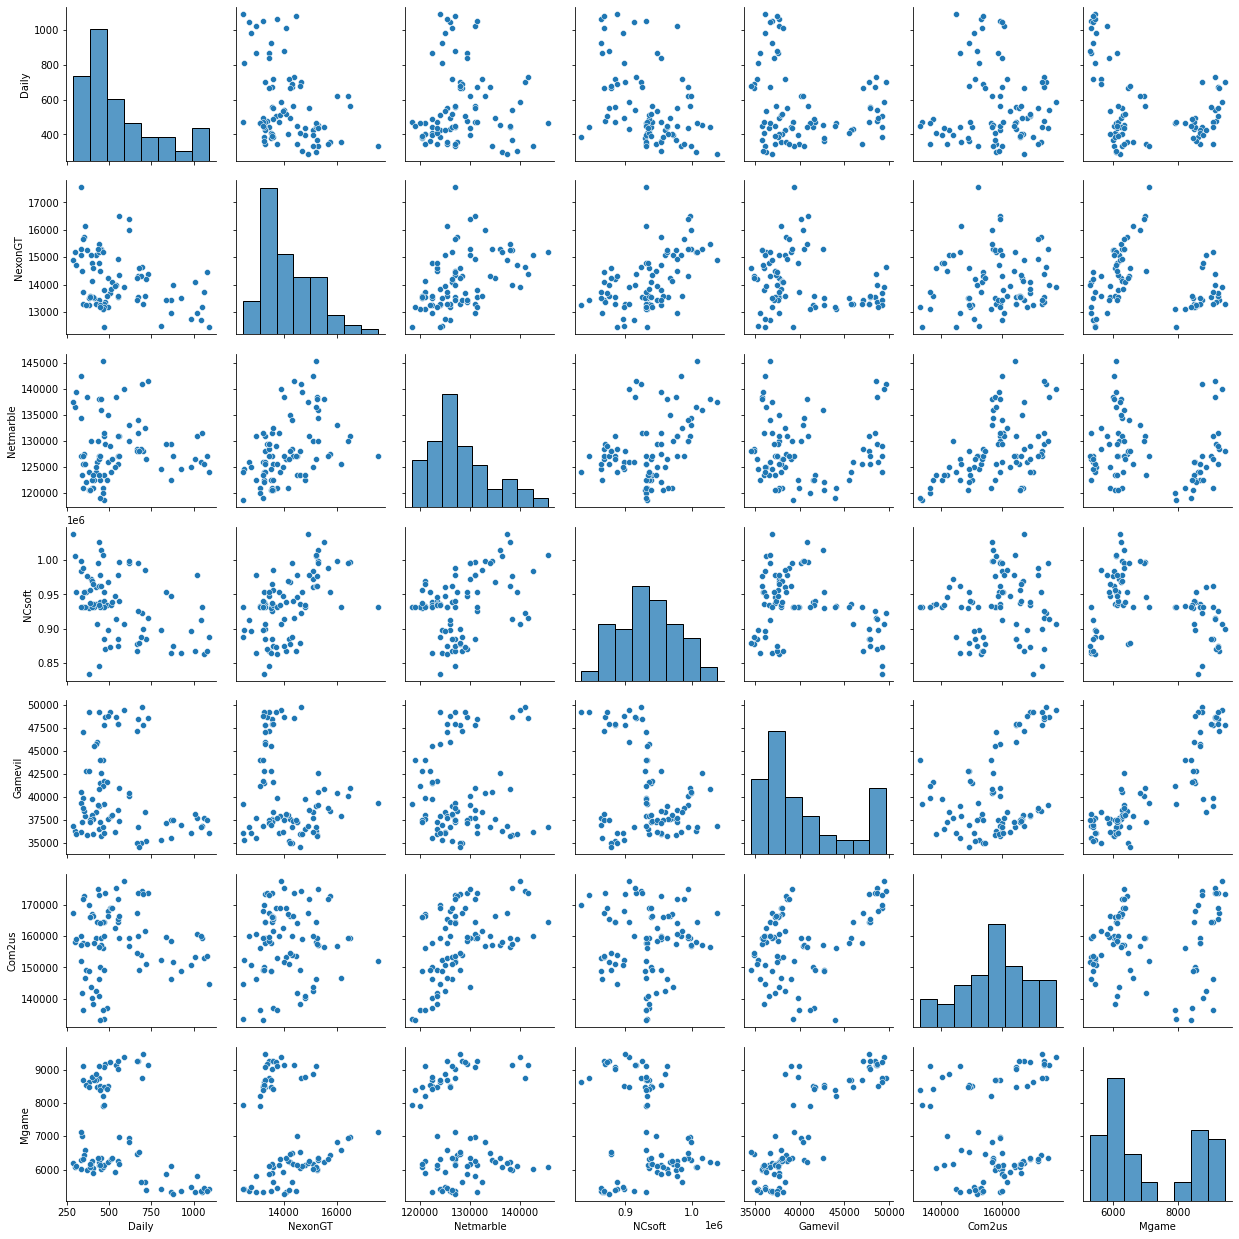

In [137]:
sns.pairplot(Cov_2)

In [202]:
t, p=stats.ttest_ind(Corona_Jongga.Daily, Corona_Jongga.NexonGT);print(p)
t, p=stats.ttest_ind(Corona_Jongga.Daily, Corona_Jongga.Netmarble);print(p)
t, p=stats.ttest_ind(Corona_Jongga.Daily, Corona_Jongga.NCsoft);print(p)
t, p=stats.ttest_ind(Corona_Jongga.Daily, Corona_Jongga.Gamevil);print(p)
t, p=stats.ttest_ind(Corona_Jongga.Daily, Corona_Jongga.Com2us);print(p)
t, p=stats.ttest_ind(Corona_Jongga.Daily, Corona_Jongga.Mgame);print(p)


5.382110800111723e-207
0.0
0.0
2.418606225e-313
0.0
1.1250238952216136e-246


In [203]:
t, p=stats.ttest_ind(Corona_Jongga.NexonGT, Corona_Jongga.Netmarble);print(p)
t, p=stats.ttest_ind(Corona_Jongga.NexonGT, Corona_Jongga.NCsoft);print(p)
t, p=stats.ttest_ind(Corona_Jongga.NexonGT, Corona_Jongga.Gamevil);print(p)
t, p=stats.ttest_ind(Corona_Jongga.NexonGT, Corona_Jongga.Com2us);print(p)
t, p=stats.ttest_ind(Corona_Jongga.NexonGT, Corona_Jongga.Mgame);print(p)

6.4875693371195e-311
0.0
1.9854119082144928e-182
1.107e-321
2.251575144588146e-96


In [204]:
t, p=stats.ttest_ind(Corona_Jongga.Netmarble, Corona_Jongga.NCsoft);print(p)
t, p=stats.ttest_ind(Corona_Jongga.Netmarble, Corona_Jongga.Gamevil);print(p)
t, p=stats.ttest_ind(Corona_Jongga.Netmarble, Corona_Jongga.Com2us);print(p)
t, p=stats.ttest_ind(Corona_Jongga.Netmarble, Corona_Jongga.Mgame);print(p)

0.0
5.716223216998517e-256
0.09737810645056
0.0


In [205]:
t, p=stats.ttest_ind(Corona_Jongga.NCsoft, Corona_Jongga.Gamevil);print(p)
t, p=stats.ttest_ind(Corona_Jongga.NCsoft, Corona_Jongga.Com2us);print(p)
t, p=stats.ttest_ind(Corona_Jongga.NCsoft, Corona_Jongga.Mgame);print(p)

0.0
0.0
0.0


In [206]:
t, p=stats.ttest_ind(Corona_Jongga.Gamevil, Corona_Jongga.Com2us);print(p)
t, p=stats.ttest_ind(Corona_Jongga.Gamevil, Corona_Jongga.Mgame);print(p)
t, p=stats.ttest_ind(Corona_Jongga.Com2us, Corona_Jongga.Mgame);print(p)

1.4899767832747128e-267
4.137409222192229e-268
0.0


### 모든 경우에 대해 p-value<0.05를 보이므로 유의한 차이를 갖고 있다고 볼 수 있다.